In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

In [161]:
# Load the dataset
insurance_data = pd.read_csv('insurance.csv')

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [162]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## feature engineering

In [163]:
# use one hot encoding for 'sex','smoker','region'
featured_data = pd.get_dummies(insurance_data, columns=['sex','smoker','region'], prefix=['sex','smoker','region'])

# Convert all one-hot encoded columns to integers explicitly
for col in featured_data.columns:
    if featured_data[col].dtype == 'bool':  # Check if dtype is uint8
        featured_data[col] = featured_data[col].astype(int)

featured_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [164]:
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int32  
 5   sex_male          1338 non-null   int32  
 6   smoker_no         1338 non-null   int32  
 7   smoker_yes        1338 non-null   int32  
 8   region_northeast  1338 non-null   int32  
 9   region_northwest  1338 non-null   int32  
 10  region_southeast  1338 non-null   int32  
 11  region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 83.8 KB


In [165]:
# Data Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(featured_data)

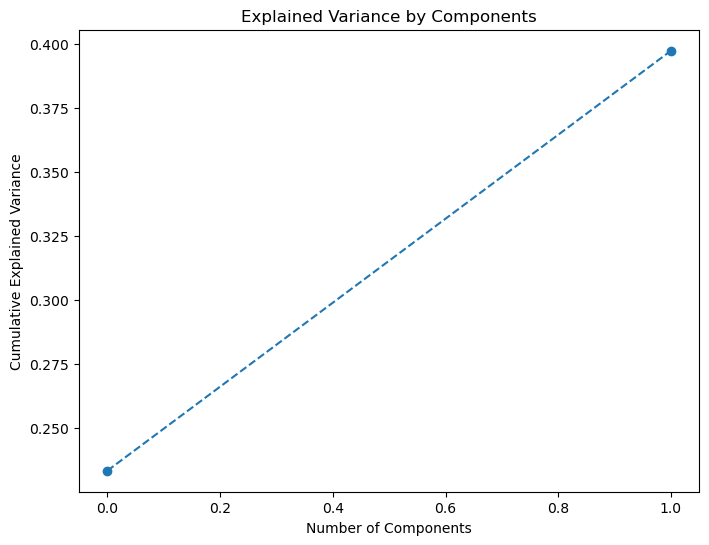

In [166]:
# Use PCA to reduce dimensionality for easier clustering
pca = PCA(n_components=2)  # Adjust components based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Plot cumulative variance to decide the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

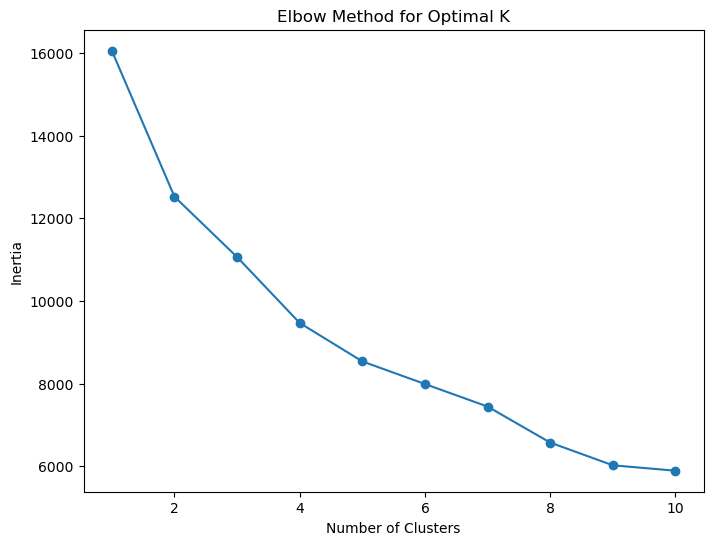

In [167]:
# Determine optimal clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=122)
    # kmeans.fit(pca_features)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [201]:
# Apply clustering
# kmeans = KMeans(n_clusters=4, random_state=122)  # Adjust number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=2, random_state=122)  # Adjust number of clusters based on the elbow plot
# clusters = kmeans.fit_predict(pca_features)
clusters = kmeans.fit_predict(scaled_data)

In [202]:
# Evaluate clustering performance
# silhouette_avg = silhouette_score(pca_features, clusters)
silhouette_avg = silhouette_score(scaled_data, clusters)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2854138374320771


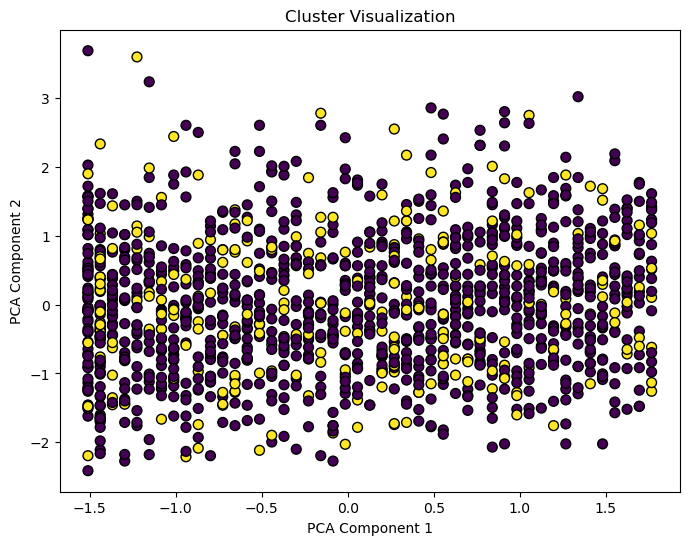

In [203]:
# Visualize clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
# plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()